In [174]:
import numpy as np
data = np.load("exercise1.npz")
XA1 = data['XA1']
yA1 = data['yA1']
XA2 = data['XA2']
yA2 = data['yA2']

XB1 = data['XB1']
yB1 = data['yB1']
XB2 = data['XB2']
yB2 = data['yB2']
data.close()

In [199]:
from sklearn import linear_model
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score


def evaluate_performance(X,y,cv_):
    reg = linear_model.LinearRegression()
    cv_results = cross_validate(reg, X, y, cv=cv_, scoring=('r2','neg_mean_squared_error'))
    sorted(cv_results.keys())
    ['fit_time', 'score_time', 'test_score']
    test_mean_squared_error = -np.mean(cv_results['test_neg_mean_squared_error'])
    test_r2 = np.mean(cv_results['test_r2'])
    return test_mean_squared_error, test_r2



In [252]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

def random_forest_feature_selection(X, y, nr_ests = 10):
    rf = RandomForestRegressor(n_estimators = nr_ests, max_depth = 5, min_samples_leaf = 5)
    rf.fit(X, y)
    feature_importance = rf.feature_importances_
    sorted_features = sorted(range(len(feature_importance)), key=lambda k: feature_importance[k])
    #sorted_features = sorted_features.reverse()
    return sorted_features

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector



In [269]:
xData = XA1
yData = yA1 

nrFeatures = xData.shape[1]

performance_random_forest = [];
random_forest_features = random_forest_feature_selection(xData, yData, nr_ests = 100)[::-1]
#print(random_forest_features)
for i in range(1,nrFeatures):
    features_i = random_forest_features[:i]
    #print(features_i)
    performance_random_forest.append(evaluate_performance(xData[:,features_i],yData,10))
#performance_random_forest   
    

[(3.5921487817533864, -0.1314791123412682), (3.388194404599794, -0.07577836980012781), (3.271093262323391, -0.03785483299439631), (3.2918785211825146, -0.046530146435996976), (2.9425750709165803, 0.06038387479493693), (2.837607980482785, 0.0914950762592501), (2.846456241489107, 0.07506293399286681), (2.9068329242924285, 0.05269635509569136), (2.919198485685316, 0.045376217635590535)]


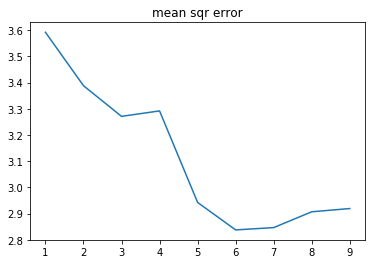

In [270]:
import matplotlib.pyplot as plt
#print(performance_random_forest)
plt.plot(range(1,nrFeatures),[i[0] for i in performance_random_forest])
plt.title('mean sqr error')
plt.show()

AttributeError: 'list' object has no attribute 'tolist'